# Olympics Data Analysis | Data Analysis Project | Machine Learning with Deployment


### Introduction to Olympics Data Analysis: A Comprehensive Data Analysis Project with Machine Learning and Deployment

#### The Olympics, being one of the grandest global sporting events, captivates the world with its spirit of unity, competition, and athletic excellence. Behind the scenes, a treasure trove of data is generated, encompassing athletes' performances, historical records, and various other crucial metrics. Unlocking the insights hidden within this vast ocean of data presents an exciting opportunity to delve into the realm of data analysis and machine learning.

#### In this ambitious project, we embark on a journey to explore the intricacies of the Olympics dataset, harnessing the power of cutting-edge data analysis techniques and machine learning algorithms. Our goal is to uncover meaningful patterns, trends, and correlations that can shed light on athletes' achievements, the evolution of sports, and the factors influencing success on the global stage.

#### This comprehensive endeavor will take us through data cleaning, preprocessing, and visualization to ensure the accuracy and reliability of our analysis. Leveraging state-of-the-art machine learning models, we will predict and analyze various performance metrics, enabling us to understand the key factors that contribute to an athlete's success in specific disciplines.

#### Furthermore, our dedication to practicality and usability extends to deploying the machine learning model into a user-friendly interface, making the valuable insights accessible to a broader audience. Whether you are an Olympic enthusiast, a sports analyst, or simply curious about the fascinating world of data, this project promises to be a riveting and enriching experience.

#### Join us as we embark on this exhilarating journey of Olympics Data Analysis, combining the power of data and the prowess of machine learning to unravel the untold stories of sporting excellence. Together, we will celebrate the harmony of sports and technology, unleashing the potential that lies within this treasure trove of information.

#### Let the games begin!

### Data source
https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [67]:
import numpy as np
import pandas as pd
import plotly.express as px

#### Now we will go to pycharm to create project for web application
#### We will install streamlit from the terminal with the code 
pip install streamlit

#### st.sidebar: This refers to the sidebar of the Streamlit web application. The sidebar is a section where you can place widgets to interact with the application.
#### radio: This function creates a radio button widget. A radio button allows the user to select one option from a list of options.
#### ('Medal Tally', 'Overall Analysis', 'Country-wise Analysis', 'Player-wise Analysis'): This tuple contains the options that the user can choose from. In this case, the options are "Medal Tally," "Overall Analysis," "Country-wise Analysis," and "Player-wise Analysis."
#### 'Select an Option': This is the label or prompt displayed above the radio button widget, instructing the user to select an option.
#### When the user runs the Streamlit application and interacts with this radio button widget in the sidebar, they can choose one of the provided options, which can then be used to control the behavior of the application (e.g., displaying different types of analysis based on the user's selection).

st.sidebar.radio(
   
   'Select an Option',
    
    ('Medal Tally','Overall Analysis','Country-wise Analysis','Player-wise Analysis')
)

#### To run program on streamlit we will go to the terminal and write
streamlit run app.py 
#### as our file name is app.py

#### Now let us create medal tally

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df =  pd.read_csv('noc_regions.csv')

In [3]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
df.shape

(271116, 15)

#### We are only interested in summer olympics so let's filter the data

In [5]:
df = df[df['Season'] == 'Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

#### Based on the NOC we can find the region in another data set so let us merge the dataset

In [8]:
df = df.merge(region_df,on = 'NOC', how = 'left')

#### df: This is the left DataFrame, which means it is the DataFrame that you are starting with or want to keep all the records from.

#### region_df: This is the right DataFrame, which contains additional information or data that you want to combine with the left DataFrame based on a common column.

#### on='NOC': This parameter specifies the column name that is common to both DataFrames and will be used as the key to merge them. In this case, the column 'NOC' is the key column, and it must exist in both df and region_df.

#### how='left': This parameter specifies the type of merge operation to perform. In this case, it's a left merge, denoted by 'left'. A left merge keeps all the records from the left DataFrame (df) and includes matching records from the right DataFrame (region_df) based on the common key. If a match is not found in region_df, the resulting DataFrame will contain NaN values in the columns from region_df.

#### In summary, the left merge operation combines the DataFrames df and region_df based on the common 'NOC' column. The resulting DataFrame will contain all the records from df along with additional information from region_df for those rows where a match on 'NOC' is found. If a matching 'NOC' value is not found in region_df, the corresponding columns from region_df in the resulting DataFrame will have NaN values.







In [9]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

#### Let's find the region based medal count

In [10]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

 #### To count the number of country who have participated till the date then

In [11]:
df['region'].unique().shape

(206,)

#### Hence there were 206 countries participating in olympics

#### Now we will check two things whether there are any missing values and other is, if there is duplicate values

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
df.duplicated().sum()

1385

#### Let us remove the duplicates

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

0

#### Now we will count medals based on NOC using groupby method

In [16]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [17]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

#### We will do OneHotEncoding to make different columns for gold, silver and bronze columns

In [18]:
pd.get_dummies(df['Medal'])

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

#### The pd.get_dummies() function is a method provided by the pandas library in Python. It is used to convert categorical data into dummy/indicator variables, also known as one-hot encoding. It is a common preprocessing step in machine learning and data analysis tasks.

#### Here, each unique medal type (Gold, Silver, and Bronze) becomes a new column, and a binary value (1 or 0) is used to indicate whether the athlete won that particular medal in a given row. If an athlete did not win a specific medal, the corresponding value in that medal's column will be 0, and if they won that medal, the value will be 1.

#### The one-hot encoding technique is useful for machine learning algorithms because it converts categorical data into a numerical representation, making it easier for the algorithms to process and understand the data. It avoids assigning any ordinal relationship or numerical weight to the categorical values, which could lead to incorrect assumptions during analysis.


#### We will join the original datas with the dummy variables

In [19]:
pd.concat([df,pd.get_dummies(df['Medal'])], axis = 1)

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 20 columns]

In [20]:
df = pd.concat([df,pd.get_dummies(df['Medal'])], axis = 1)

In [21]:
df.shape


(221167, 20)

#### Now we will groupby using NOC

In [22]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']]

Gold  Silver  Bronze
NOC                       
AFG    0.0     0.0     2.0
AHO    0.0     1.0     0.0
ALB    0.0     0.0     0.0
ALG    5.0     4.0     8.0
AND    0.0     0.0     0.0
..     ...     ...     ...
YEM    0.0     0.0     0.0
YMD    0.0     0.0     0.0
YUG  130.0   161.0    92.0
ZAM    0.0     1.0     1.0
ZIM   17.0     4.0     1.0

[230 rows x 3 columns]

#### Let us sort in descending based on 'Gold'

In [23]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending = False)

Gold  Silver  Bronze
NOC                        
USA  2472.0  1333.0  1197.0
URS   832.0   635.0   596.0
GBR   635.0   729.0   620.0
GER   592.0   538.0   649.0
ITA   518.0   474.0   454.0
..      ...     ...     ...
AHO     0.0     1.0     0.0
LBR     0.0     0.0     0.0
LCA     0.0     0.0     0.0
LES     0.0     0.0     0.0
LBA     0.0     0.0     0.0

[230 rows x 3 columns]

In [24]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending = False).reset_index()

NOC    Gold  Silver  Bronze
0    USA  2472.0  1333.0  1197.0
1    URS   832.0   635.0   596.0
2    GBR   635.0   729.0   620.0
3    GER   592.0   538.0   649.0
4    ITA   518.0   474.0   454.0
..   ...     ...     ...     ...
225  AHO     0.0     1.0     0.0
226  LBR     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0
228  LES     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0

[230 rows x 4 columns]

In [25]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending = False).reset_index().head(25)

NOC    Gold  Silver  Bronze
0   USA  2472.0  1333.0  1197.0
1   URS   832.0   635.0   596.0
2   GBR   635.0   729.0   620.0
3   GER   592.0   538.0   649.0
4   ITA   518.0   474.0   454.0
5   FRA   463.0   567.0   587.0
6   HUN   432.0   328.0   363.0
7   SWE   354.0   396.0   358.0
8   AUS   342.0   452.0   510.0
9   GDR   339.0   277.0   227.0
10  CHN   334.0   317.0   258.0
11  RUS   296.0   278.0   331.0
12  NED   245.0   302.0   371.0
13  JPN   230.0   287.0   333.0
14  NOR   227.0   196.0   167.0
15  DEN   179.0   236.0   177.0
16  KOR   171.0   206.0   175.0
17  CUB   164.0   129.0   116.0
18  ROU   161.0   200.0   290.0
19  CAN   158.0   239.0   344.0
20  FRG   144.0   172.0   188.0
21  FIN   132.0   125.0   217.0
22  IND   131.0    19.0    40.0
23  YUG   130.0   161.0    92.0
24  POL   111.0   185.0   242.0

#### This is showing the wrong data USA hasn't won so much of gold medal as per wikipedia

#### From the analysis what i find is the medals are organized based on the name of the players. If the game is a teaam game and if any  team wins then the gold medal goes to all the players and we added all of them

In [26]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

#### To get rid of this issues, we need to drop the columns based on duplicates on team, NOC, Games, year, Season ......................

In [27]:
medal_tally = df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [28]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending = False).reset_index()

In [29]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

#### Still the values of gold of usa doesont match to the real data. We need to get the reason behind this.

In [30]:
 medal_tally[medal_tally['region'] == 'India']

region  Gold  Silver  Bronze  total
46  India   9.0     7.0    12.0   28.0

#### The data of india is correct. There may be some exception in the datas

In [31]:
backup = medal_tally.copy()

In [32]:
medal_tally.to_csv('olympics-clean-data.csv', index = False)

In [33]:
medal_tally

region    Gold  Silver  Bronze   total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]

#### Now in the pycharm we made the basic as shown in above.

#### Now we will add the drop down in pycharm to show data based on the dates and countries.

#### We will go to year columns and see 

In [34]:
df['Year'].unique().tolist()

[1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [35]:
years = df['Year'].unique().tolist()

In [36]:
years.sort()

In [37]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [38]:
years.insert(0, 'Overall')

In [39]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [40]:
country = np.unique(df['region'].dropna().values).tolist()

In [41]:
country.sort()

In [42]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [43]:
country.insert(0, 'Overall')

In [44]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

#### Now let us create a funciton to fetch country and year. There can be four options between them. First is both overall , second is country overall and year number , third is country specific and year overall and last one is both the values

In [45]:
def fetch_medal_tally(df, year , country):
    medal_df = df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag  = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()  
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending = False).reset_index()  

        
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)
    
    
                         




In [46]:
fetch_medal_tally(df , year = "Overall", country = "Nepal")

    Year  Gold  Silver  Bronze  Total
0   1964     0       0       0      0
1   1972     0       0       0      0
2   1976     0       0       0      0
3   1980     0       0       0      0
4   1984     0       0       0      0
5   1988     0       0       0      0
6   1992     0       0       0      0
7   1996     0       0       0      0
8   2000     0       0       0      0
9   2004     0       0       0      0
10  2008     0       0       0      0
11  2012     0       0       0      0
12  2016     0       0       0      0


In [47]:
medal_df = df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [48]:
medal_df

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 20 columns]

#### In case of overall medal_df can be given as it contain all the data 

#### If the year is overall and specific country is given for example India

In [49]:
medal_df[medal_df['region'] == 'India']

ID                                           Name Sex   Age  \
436        281                                 S. Abdul Hamid   M   NaN   
437        281                                 S. Abdul Hamid   M   NaN   
790        512                Shiny Kurisingal Abraham-Wilson   F  19.0   
791        512                Shiny Kurisingal Abraham-Wilson   F  19.0   
792        512                Shiny Kurisingal Abraham-Wilson   F  23.0   
...        ...                                            ...  ..   ...   
216942  132143                            Vikas Krishan Yadav   M  24.0   
216985  132177                           Mohammad Anas Yahiya   M  21.0   
218411  133029  Thyadathuvilla Chandrapillai "T. C." Yohannan   M  29.0   
222416  135480                                   Geeta Zutshi   F  23.0   
222417  135480                                   Geeta Zutshi   F  27.0   

        Height  Weight   Team  NOC        Games  Year  Season            City  \
436        NaN     NaN  India  IND  1928 Summer  1928  Summer       Amsterdam   
437        NaN     NaN  India  IND  1928 Summer  1928  Summer       Amsterdam   
790      167.0    53.0  India  IND  1984 Summer  1984  Summer     Los Angeles   
791      167.0    53.0  India  IND  1984 Summer  1984  Summer     Los Angeles   
792      167.0    53.0  India  IND  1988 Summer  1988  Summer           Seoul   
...        ...     ...    ...  ...          ...   ...     ...             ...   
216942   177.0    69.0  India  IND  2016 Summer  2016  Summer  Rio de Janeiro   
216985   177.0    69.0  India  IND  2016 Summer  2016  Summer  Rio de Janeiro   
218411   174.0    62.0  India  IND  1976 Summer  1976  Summer        Montreal   
222416   167.0    51.0  India  IND  1980 Summer  1980  Summer          Moskva   
222417   167.0    51.0  India  IND  1984 Summer  1984  Summer     Los Angeles   

            Sport                                   Event Medal region notes  \
436     Athletics      Athletics Men's 110 metres Hurdles   NaN  India   NaN   
437     Athletics      Athletics Men's 400 metres Hurdles   NaN  India   NaN   
790     Athletics            Athletics Women's 800 metres   NaN  India   NaN   
791     Athletics  Athletics Women's 4 x 400 metres Relay   NaN  India   NaN   
792     Athletics            Athletics Women's 800 metres   NaN  India   NaN   
...           ...                                     ...   ...    ...   ...   
216942     Boxing               Boxing Men's Middleweight   NaN  India   NaN   
216985  Athletics              Athletics Men's 400 metres   NaN  India   NaN   
218411  Athletics               Athletics Men's Long Jump   NaN  India   NaN   
222416  Athletics            Athletics Women's 800 metres   NaN  India   NaN   
222417  Athletics          Athletics Women's 3,000 metres   NaN  India   NaN   

        Bronze  Gold  Silver  
436          0     0       0  
437          0     0       0  
790          0     0       0  
791          0     0       0  
792          0     0       0  
...        ...   ...     ...  
216942       0     0       0  
216985       0     0       0  
218411       0     0       0  
222416       0     0       0  
222417       0     0       0  

[687 rows x 20 columns]

#### When year is specific and country is overall then it can be done as

In [50]:
medal_df[medal_df['Year'] == 2016]

ID                             Name Sex   Age  Height  Weight  \
34          22                    Andreea Aanei   F  22.0   170.0   125.0   
77          51                Nstor Abad Sanjun   M  23.0   167.0    64.0   
78          51                Nstor Abad Sanjun   M  23.0   167.0    64.0   
79          51                Nstor Abad Sanjun   M  23.0   167.0    64.0   
80          51                Nstor Abad Sanjun   M  23.0   167.0    64.0   
...        ...                              ...  ..   ...     ...     ...   
222327  135410        Zaidatul Husniah Zulkifli   F  22.0   156.0    40.0   
222346  135421  Goretti Alejandra Zumaya Flores   F  19.0   165.0    65.0   
222383  135453                  Kelita Zupancic   F  26.0   169.0    70.0   
222407  135478                Henrikas ustautas   M  22.0   192.0    96.0   
222500  135528                    Marc Zwiebler   M  32.0   181.0    75.0   

             Team  NOC        Games  Year  Season            City  \
34        Romania  ROU  2016 Summer  2016  Summer  Rio de Janeiro   
77          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
78          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
79          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
80          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
...           ...  ...          ...   ...     ...             ...   
222327   Malaysia  MAS  2016 Summer  2016  Summer  Rio de Janeiro   
222346     Mexico  MEX  2016 Summer  2016  Summer  Rio de Janeiro   
222383     Canada  CAN  2016 Summer  2016  Summer  Rio de Janeiro   
222407  Lithuania  LTU  2016 Summer  2016  Summer  Rio de Janeiro   
222500    Germany  GER  2016 Summer  2016  Summer  Rio de Janeiro   

                Sport                                        Event Medal  \
34      Weightlifting      Weightlifting Women's Super-Heavyweight   NaN   
77         Gymnastics       Gymnastics Men's Individual All-Around   NaN   
78         Gymnastics              Gymnastics Men's Floor Exercise   NaN   
79         Gymnastics               Gymnastics Men's Parallel Bars   NaN   
80         Gymnastics              Gymnastics Men's Horizontal Bar   NaN   
...               ...                                          ...   ...   
222327      Athletics                 Athletics Women's 100 metres   NaN   
222346       Shooting        Shooting Women's Air Rifle, 10 metres   NaN   
222383           Judo                    Judo Women's Middleweight   NaN   
222407       Canoeing  Canoeing Men's Canadian Singles, 200 metres   NaN   
222500      Badminton                      Badminton Men's Singles   NaN   

           region notes  Bronze  Gold  Silver  
34        Romania   NaN       0     0       0  
77          Spain   NaN       0     0       0  
78          Spain   NaN       0     0       0  
79          Spain   NaN       0     0       0  
80          Spain   NaN       0     0       0  
...           ...   ...     ...   ...     ...  
222327   Malaysia   NaN       0     0       0  
222346     Mexico   NaN       0     0       0  
222383     Canada   NaN       0     0       0  
222407  Lithuania   NaN       0     0       0  
222500    Germany   NaN       0     0       0  

[7494 rows x 20 columns]

#### if both the entries are specific then we can do it as

In [51]:
medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == 'India')]

ID                      Name Sex   Age  Height  Weight   Team  \
1015       663     Sharath Kamal Achanta   M  34.0   186.0    85.0  India   
7065      4523               Seema Antil   F  33.0   182.0    92.0  India   
8713      5562               Aditi Ashok   F  18.0   173.0    57.0  India   
9202      5868                Manu Attri   M  23.0   172.0    73.0  India   
10070     6427      Lalita Shivaji Babar   F  27.0   166.0    50.0  India   
...        ...                       ...  ..   ...     ...     ...    ...   
182260  111467  Sathish Kumar Sivalingam   M  24.0   175.0    77.0  India   
195568  119515               Shiva Thapa   M  22.0   169.0    56.0  India   
198042  120871             Sandeep Tomar   M  25.0   168.0    61.0  India   
216942  132143       Vikas Krishan Yadav   M  24.0   177.0    69.0  India   
216985  132177      Mohammad Anas Yahiya   M  21.0   177.0    69.0  India   

        NOC        Games  Year  Season            City          Sport  \
1015    IND  2016 Summer  2016  Summer  Rio de Janeiro   Table Tennis   
7065    IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
8713    IND  2016 Summer  2016  Summer  Rio de Janeiro           Golf   
9202    IND  2016 Summer  2016  Summer  Rio de Janeiro      Badminton   
10070   IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
...     ...          ...   ...     ...             ...            ...   
182260  IND  2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting   
195568  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
198042  IND  2016 Summer  2016  Summer  Rio de Janeiro      Wrestling   
216942  IND  2016 Summer  2016  Summer  Rio de Janeiro         Boxing   
216985  IND  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   

                                              Event Medal region notes  \
1015                     Table Tennis Men's Singles   NaN  India   NaN   
7065                 Athletics Women's Discus Throw   NaN  India   NaN   
8713                        Golf Women's Individual   NaN  India   NaN   
9202                        Badminton Men's Doubles   NaN  India   NaN   
10070   Athletics Women's 3,000 metres Steeplechase   NaN  India   NaN   
...                                             ...   ...    ...   ...   
182260             Weightlifting Men's Middleweight   NaN  India   NaN   
195568                    Boxing Men's Bantamweight   NaN  India   NaN   
198042     Wrestling Men's Featherweight, Freestyle   NaN  India   NaN   
216942                    Boxing Men's Middleweight   NaN  India   NaN   
216985                   Athletics Men's 400 metres   NaN  India   NaN   

        Bronze  Gold  Silver  
1015         0     0       0  
7065         0     0       0  
8713         0     0       0  
9202         0     0       0  
10070        0     0       0  
...        ...   ...     ...  
182260       0     0       0  
195568       0     0       0  
198042       0     0       0  
216942       0     0       0  
216985       0     0       0  

[68 rows x 20 columns]

#### We will see for the Overall analysis
- No of editions
- No of cities
- No of events or sports
- No of athletes
- No of participating nations

In [52]:
df


ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 20 columns]

#### How many time the olympics happens in total

In [53]:
df['Year'].unique().shape[0] - 1

28

#### From the google i found that olympics happens only for 28 times. This is due to one of the olympics was not given validation as it vialotes the occurring in four years.

#### Now let us find in how many cities the olympics happened?

In [54]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [55]:
df['Sport'].unique().shape

(52,)

#### Hence  52 sports were played 

In [56]:
df['Sport'].unique()


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [57]:
df["Event"].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [58]:
df['Event'].unique().shape

(651,)

In [59]:
df['Name'].unique().shape

(116122,)

In [60]:
df['region'].unique().shape

(206,)

In [127]:
nation_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')


In [128]:
nation_over_time

index  Year
28   1896    12
22   1900    31
27   1904    14
26   1906    20
25   1908    22
24   1912    29
23   1920    29
21   1924    45
20   1928    46
19   1932    47
18   1936    49
17   1948    59
16   1952    67
15   1956    71
13   1960    83
11   1964    93
10   1968   111
9    1972   120
12   1976    91
14   1980    80
8    1984   139
7    1988   156
6    1992   168
5    1996   196
4    2000   199
3    2004   200
2    2008   202
1    2012   203
0    2016   204

#### Let's break down the code step by step:

#### df.drop_duplicates(['Year', 'region']): This part of the code drops duplicate rows in the DataFrame df based on the columns 'Year' and 'region'. It keeps only the first occurrence of each unique combination of 'Year' and 'region', removing any subsequent duplicates.

#### ['Year'].value_counts(): After dropping the duplicates, the code selects only the 'Year' column from the resulting DataFrame and applies the value_counts() method to count the occurrences of each unique 'Year' value.

#### .reset_index(): The reset_index() method is used to convert the 'Year' and its corresponding count into a new DataFrame. It resets the index of the DataFrame so that the 'Year' becomes a regular column, and the old index is added as a new numerical index.

#### .sort_values('index'): Finally, the code sorts the resulting DataFrame based on the 'index' column. Since 'index' is now the 'Year' column, this step sorts the DataFrame in ascending order based on the 'Year' values.

#### In summary, the given code snippet drops duplicate rows based on the columns 'Year' and 'region', then counts the occurrences of each unique 'Year' value, and finally sorts the resulting DataFrame based on the 'Year' values in ascending order. The output will be a DataFrame with two columns: 'Year' and its corresponding count, sorted by 'Year' in ascending order.

In [150]:
nation_over_tim = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index()
nation_over_tim.columns = ['Year', 'Count']
nation_over_tim = nation_over_tim.sort_values('Year')
fig = px.line(nation_over_tim,x = 'Year', y = 'Count')
fig.show()

In [149]:
nation_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')
nation_over_time.rename(columns= {'index':'year','Year':'number_of_nations'}, inplace = True)
fig = px.line(nation_over_time,x = 'year', y = 'number_of_nations')
fig.show()

#### Let us find the number of events 

In [153]:
nation_over_events = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index()
nation_over_events.columns = ['Year', 'Number_of_events']
nation_over_events = nation_over_events.sort_values('Year')
nation_over_events

Year  Number_of_events
28  1896                43
26  1900                90
25  1904                95
27  1906                74
23  1908               109
24  1912               107
14  1920               158
20  1924               131
22  1928               122
21  1932               131
18  1936               150
15  1948               153
19  1952               149
16  1956               151
17  1960               150
13  1964               163
12  1968               172
11  1972               193
10  1976               198
9   1980               203
8   1984               221
7   1988               237
6   1992               257
5   1996               271
4   2000               300
3   2004               301
1   2008               302
2   2012               302
0   2016               306

In [154]:
fig = px.line(nation_over_events,x = 'Year', y = 'Number_of_events')
fig.show()

In [155]:
athletes_over_time = df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index()
athletes_over_time.columns = ['Year', 'Number_of_athletes']
athletes_over_time = athletes_over_time.sort_values('Year')
athletes_over_time

Year  Number_of_athletes
28  1896                 176
25  1900                1220
27  1904                 650
26  1906                 841
23  1908                2024
22  1912                2409
21  1920                2675
19  1924                3256
20  1928                3246
24  1932                1922
16  1936                4482
17  1948                4402
15  1952                4931
18  1956                3346
12  1960                5348
14  1964                5134
11  1968                5552
8   1972                7105
10  1976                6070
13  1980                5252
9   1984                6791
7   1988                8443
6   1992                9380
5   1996               10324
2   2000               10639
3   2004               10537
1   2008               10880
4   2012               10502
0   2016               11174

In [162]:
fig = px.line(athletes_over_time,x = 'Year', y = 'Number_of_athletes')
fig.show()

In [160]:
athletes_over_time = df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index()
athletes_over_time.columns = ['Year', 'Number_of_athletes']
athletes_over_time = athletes_over_time.sort_values('Year')
athletes_over_time

Year  Number_of_athletes
28  1896                 176
25  1900                1220
27  1904                 650
26  1906                 841
23  1908                2024
22  1912                2409
21  1920                2675
19  1924                3256
20  1928                3246
24  1932                1922
16  1936                4482
17  1948                4402
15  1952                4931
18  1956                3346
12  1960                5348
14  1964                5134
11  1968                5552
8   1972                7105
10  1976                6070
13  1980                5252
9   1984                6791
7   1988                8443
6   1992                9380
5   1996               10324
2   2000               10639
3   2004               10537
1   2008               10880
4   2012               10502
0   2016               11174

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
x = df.drop_duplicates(['Year','Event','Sport'])

In [172]:
x

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
160449   97860                 Lonce Gaston Quentin   M  40.0     NaN     NaN   
161311   98435                       Ioannis Raisis   M   NaN     NaN     NaN   
175283  107029                   Franz Xaver Schmid   M  27.0     NaN     NaN   
176005  107506                    Hermann Schreiber   M  26.0     NaN     NaN   
181486  110976  Peter Andreas Holger Sinding-Larsen   M  50.0     NaN     NaN   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
160449          France  FRA  1920 Summer  1920  Summer    Antwerpen   
161311          Greece  GRE  1906 Summer  1906  Summer       Athina   
175283         Germany  GER  1932 Summer  1932  Summer  Los Angeles   
176005     Switzerland  SUI  1936 Summer  1936  Summer       Berlin   
181486          Norway  NOR  1920 Summer  1920  Summer    Antwerpen   

                   Sport                                              Event  \
0             Basketball                        Basketball Men's Basketball   
1                   Judo                       Judo Men's Extra-Lightweight   
2               Football                            Football Men's Football   
3             Tug-Of-War                        Tug-Of-War Men's Tug-Of-War   
4              Athletics                       Athletics Women's 100 metres   
...                  ...                                                ...   
160449           Archery  Archery Men's Target Archery, 28 metres, Indiv...   
161311           Fencing           Fencing Men's Sabre, Masters, Individual   
175283          Alpinism                            Alpinism Mixed Alpinism   
176005       Aeronautics                      Aeronautics Mixed Aeronautics   
181486  Art Competitions                Art Competitions Mixed Architecture   

         Medal       region notes  Bronze  Gold  Silver  
0          NaN        China   NaN       0     0       0  
1          NaN        China   NaN       0     0       0  
2          NaN      Denmark   NaN       0     0       0  
3         Gold      Denmark   NaN       0     1       0  
4          NaN  Netherlands   NaN       0     0       0  
...        ...          ...   ...     ...   ...     ...  
160449  Silver       France   NaN       0     0       1  
161311  Silver       Greece   NaN       0     0       1  
175283    Gold      Germany   NaN       0     1       0  
176005    Gold  Switzerland   NaN       0     1       0  
181486  Silver       Norway   NaN       0     0       1  

[5239 rows x 20 columns]

<AxesSubplot:xlabel='Year', ylabel='Sport'>

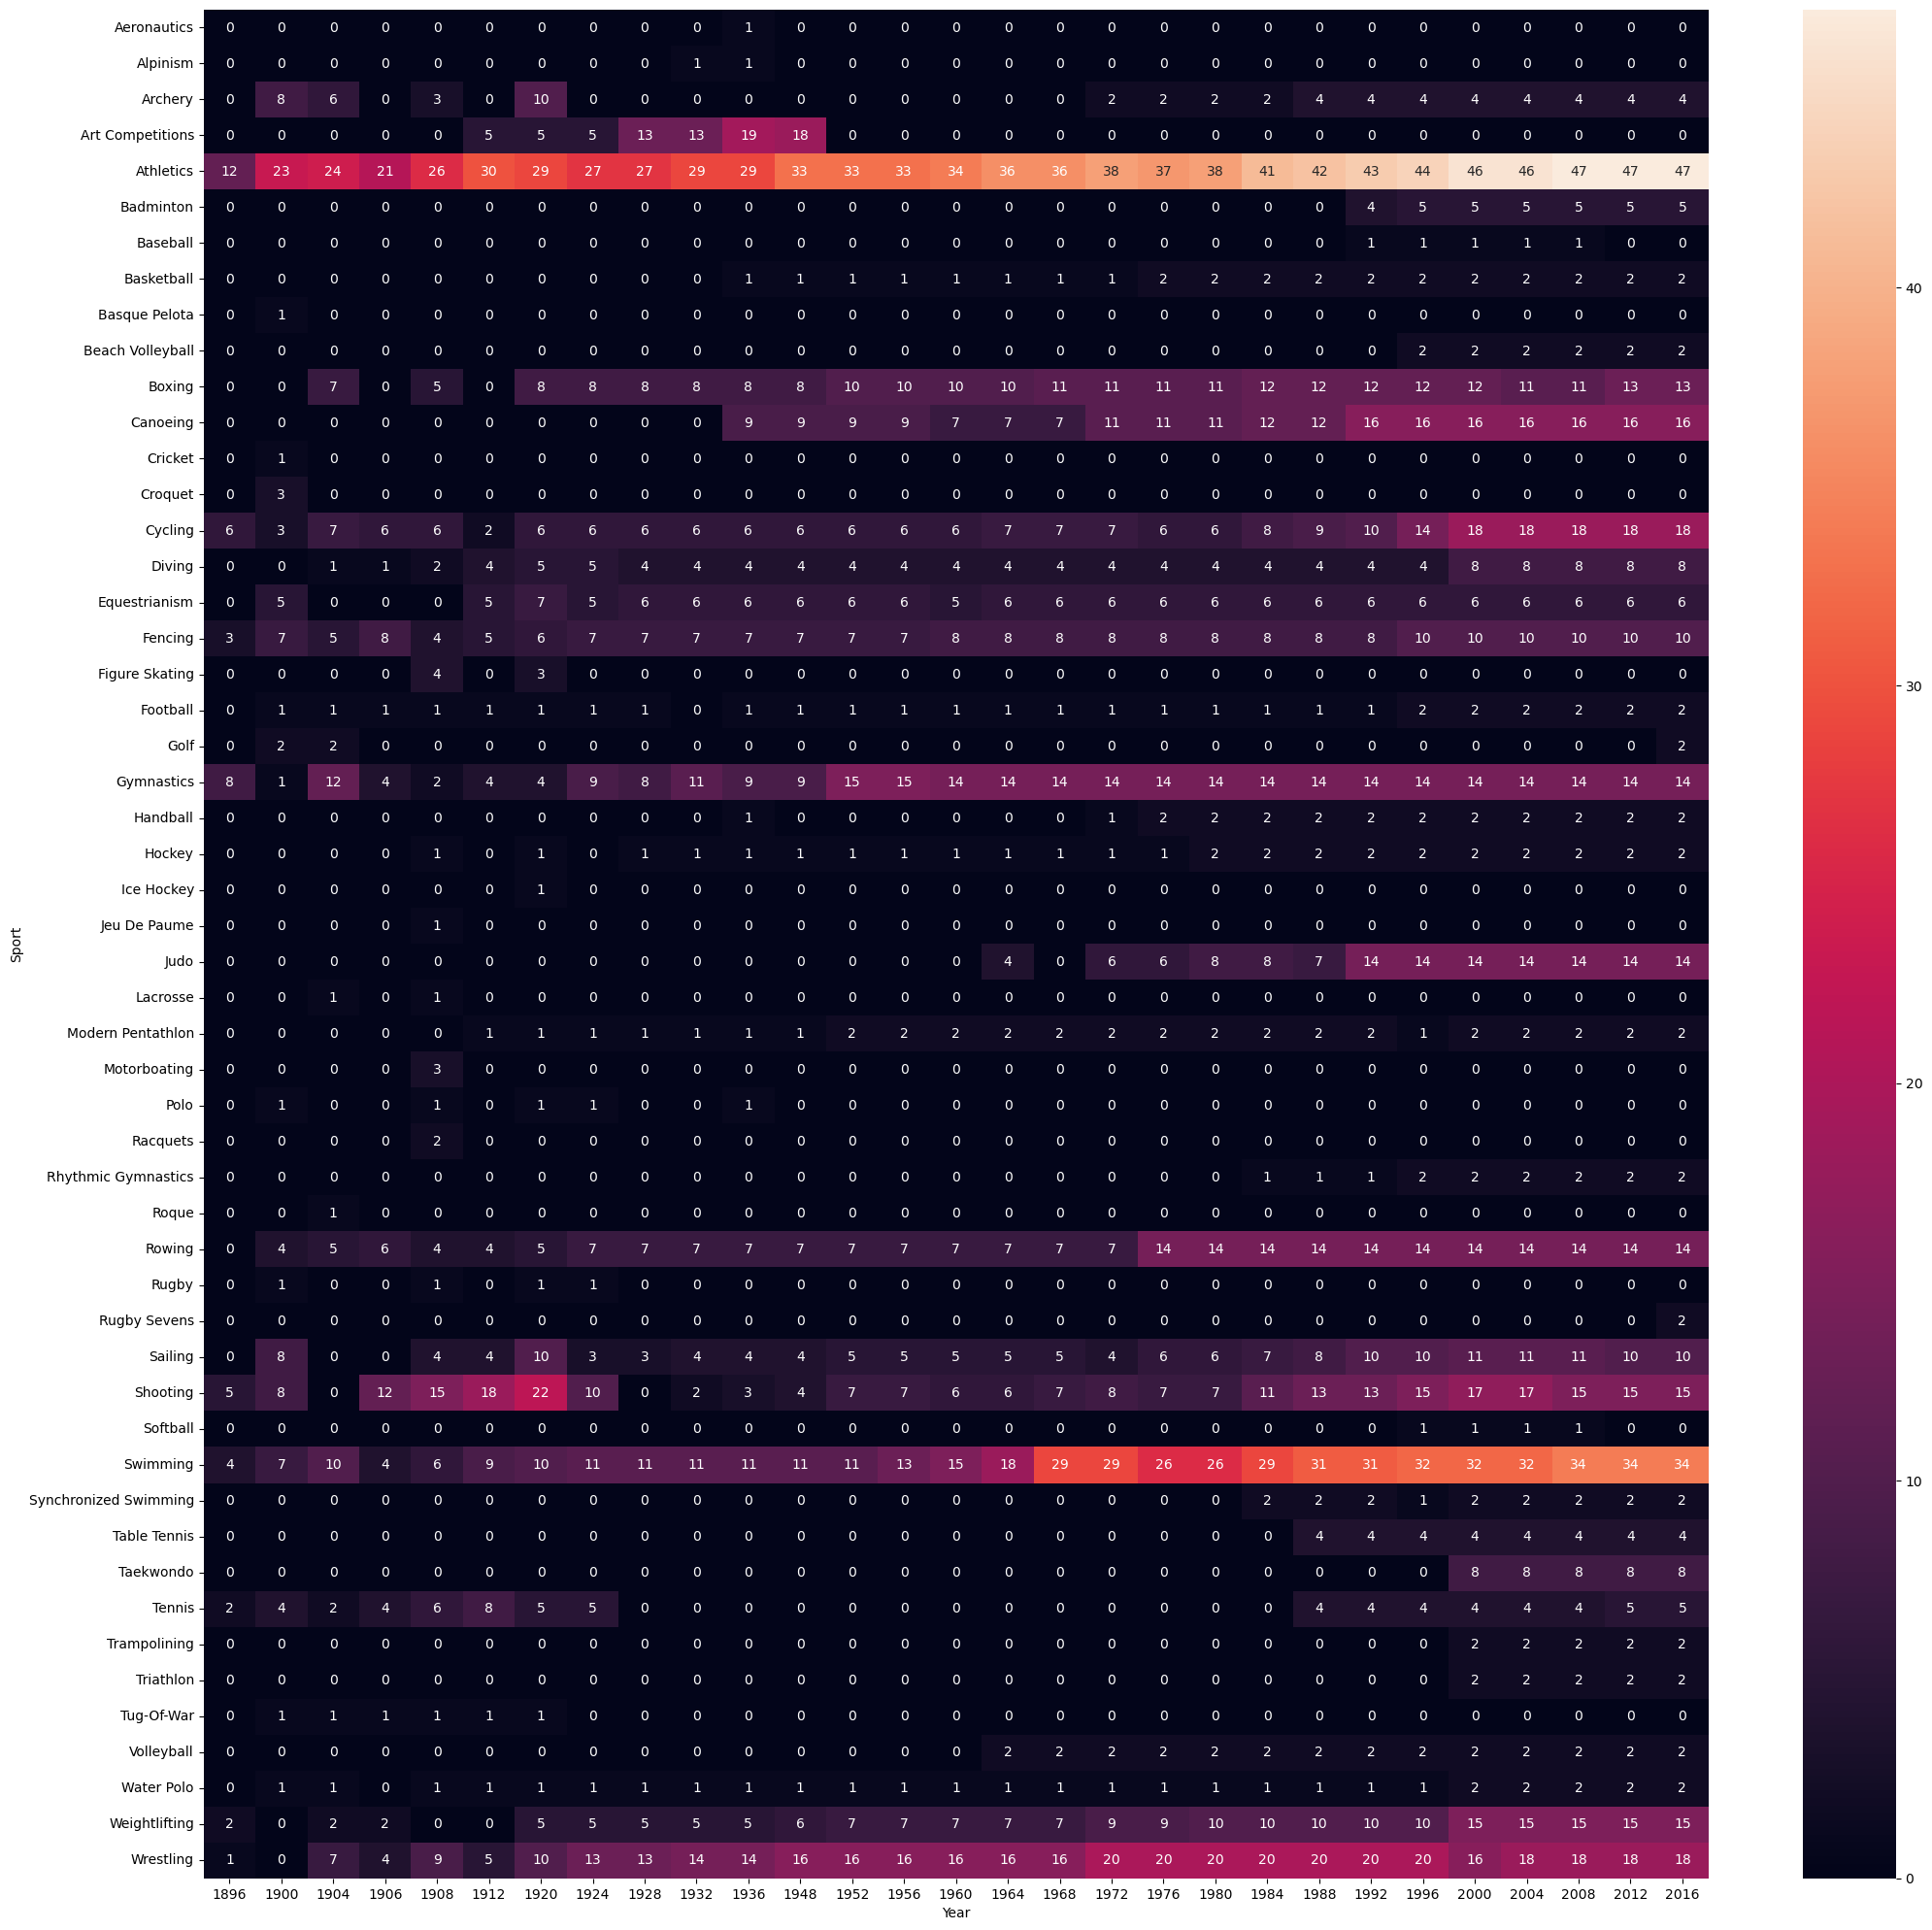

In [175]:
plt.figure(figsize = (25,25))
sns.heatmap(x.pivot_table(index = 'Sport',columns = 'Year',values = 'Event',aggfunc = 'count').fillna(0).astype('int'),annot= True)

#### x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count'): The pivot_table() function is used to create a pivot table from the DataFrame x. It aggregates the values in the 'Event' column based on the 'Sport' and 'Year' columns. The resulting pivot table will have 'Sport' as the index, 'Year' as the columns, and the count of occurrences of 'Event' as the values.

#### .fillna(0): The fillna() function is used to fill any missing (NaN) values in the pivot table with 0.

#### .astype('int'): The astype() function is used to convert the data type of the pivot table from the default float to integer (int). Since the count of occurrences is always an integer, this step ensures that the values in the pivot table are represented as integers.

#### sns.heatmap(...): The sns.heatmap() function from the Seaborn library is used to create a heatmap plot. Heatmaps are graphical representations of data where individual values are represented as colors. In this case, the heatmap will visualize the counts of events for each sport and year.

#### annot=True: The annot parameter is set to True, which means the numerical values of the pivot table will be displayed in the heatmap cells.

#### In summary, the code uses Seaborn's heatmap() function to create a heatmap plot from a pivot table of the DataFrame x. The pivot table aggregates the counts of events for each sport and year, and the resulting heatmap provides a visual representation of this data, with the counts displayed in each cell. The fillna() and astype() functions are used to handle missing values and ensure that the heatmap's numerical values are displayed as integers.






#### Now we will create the heatmap on how many sports occurs on different years

In [170]:
df.drop_duplicates(['Year','Event','Sport'])

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
160449   97860                 Lonce Gaston Quentin   M  40.0     NaN     NaN   
161311   98435                       Ioannis Raisis   M   NaN     NaN     NaN   
175283  107029                   Franz Xaver Schmid   M  27.0     NaN     NaN   
176005  107506                    Hermann Schreiber   M  26.0     NaN     NaN   
181486  110976  Peter Andreas Holger Sinding-Larsen   M  50.0     NaN     NaN   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
160449          France  FRA  1920 Summer  1920  Summer    Antwerpen   
161311          Greece  GRE  1906 Summer  1906  Summer       Athina   
175283         Germany  GER  1932 Summer  1932  Summer  Los Angeles   
176005     Switzerland  SUI  1936 Summer  1936  Summer       Berlin   
181486          Norway  NOR  1920 Summer  1920  Summer    Antwerpen   

                   Sport                                              Event  \
0             Basketball                        Basketball Men's Basketball   
1                   Judo                       Judo Men's Extra-Lightweight   
2               Football                            Football Men's Football   
3             Tug-Of-War                        Tug-Of-War Men's Tug-Of-War   
4              Athletics                       Athletics Women's 100 metres   
...                  ...                                                ...   
160449           Archery  Archery Men's Target Archery, 28 metres, Indiv...   
161311           Fencing           Fencing Men's Sabre, Masters, Individual   
175283          Alpinism                            Alpinism Mixed Alpinism   
176005       Aeronautics                      Aeronautics Mixed Aeronautics   
181486  Art Competitions                Art Competitions Mixed Architecture   

         Medal       region notes  Bronze  Gold  Silver  
0          NaN        China   NaN       0     0       0  
1          NaN        China   NaN       0     0       0  
2          NaN      Denmark   NaN       0     0       0  
3         Gold      Denmark   NaN       0     1       0  
4          NaN  Netherlands   NaN       0     0       0  
...        ...          ...   ...     ...   ...     ...  
160449  Silver       France   NaN       0     0       1  
161311  Silver       Greece   NaN       0     0       1  
175283    Gold      Germany   NaN       0     1       0  
176005    Gold  Switzerland   NaN       0     1       0  
181486  Silver       Norway   NaN       0     0       1  

[5239 rows x 20 columns]

In [174]:
x.pivot_table(index = 'Sport',columns = 'Year',values = 'Event',aggfunc = 'count').fillna(0).astype('int')

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

#### To know about the most decorated athletes in the olympics

#### We only require those athletes who have won any medals in their lifetime. so we will drop those columns where the medal iis na

In [202]:
def most_successful(df,sport):
    temp_df = df.dropna(subset = ['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on = 'index',right_on = 'Name',how = 'left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns = {'index':'Name','Name_x':'Medals'}, inplace = True)
    return x

In [203]:
most_successful(df,'Volleyball')

Name  Medals       Sport  \
0                        Sergey Yuryevich Tetyukhin       4  Volleyball   
6                                      Samuele Papi       4  Volleyball   
10                           Inna Valeryevna Ryskal       4  Volleyball   
14               Srgio "Escadinha" Dutra dos Santos       4  Volleyball   
18                   Aleksey Vladimirovich Kuleshov       3  Volleyball   
21                 Alejandrina Mireya Luis Hernndez       3  Volleyball   
24                      Yuriy Mykhailovych Poiarkov       3  Volleyball   
27            Yelena Nikolayevna Batukhtina-Tyurina       3  Volleyball   
31                                     Andrea Giani       3  Volleyball   
36  Lyudmila Stepanovna Buldakova (Meshcheryakova-)       3  Volleyball   
39                      Regla Maritza Bell McKenzie       3  Volleyball   
42                                Andrea Sartoretti       3  Volleyball   
45            Yevgeniya Viktorovna Artamonova-Estes       3  Volleyball   
51                        Rodrigo "Rodrigo" Santana       3  Volleyball   
54           Nina Nikolayevna Smoleyeva (-Nikitina)       3  Volleyball   

    region  
0   Russia  
6    Italy  
10  Russia  
14  Brazil  
18  Russia  
21    Cuba  
24  Russia  
27  Russia  
31   Italy  
36  Russia  
39    Cuba  
42   Italy  
45  Russia  
51  Brazil  
54  Russia

In [204]:
temp_df = df.dropna(subset = ['Medal'])


In [205]:
temp_df

ID                                 Name Sex   Age  Height  Weight  \
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
12          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
13          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
15          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
16          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222532  135554                         Bogusaw Zych   M  28.0   182.0    82.0   
222544  135563            Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222545  135563            Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   

                  Team  NOC        Games  Year  Season       City       Sport  \
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris  Tug-Of-War   
12             Finland  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
13             Finland  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
15             Finland  FIN  1948 Summer  1948  Summer     London  Gymnastics   
16             Finland  FIN  1948 Summer  1948  Summer     London  Gymnastics   
...                ...  ...          ...   ...     ...        ...         ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer  Melbourne   Athletics   
222530    Soviet Union  URS  1964 Summer  1964  Summer      Tokyo   Athletics   
222532          Poland  POL  1980 Summer  1980  Summer     Moskva     Fencing   
222544          Russia  RUS  2000 Summer  2000  Summer     Sydney   Athletics   
222545          Russia  RUS  2004 Summer  2004  Summer     Athina   Athletics   

                                         Event   Medal   region notes  Bronze  \
3                  Tug-Of-War Men's Tug-Of-War    Gold  Denmark   NaN       0   
12      Swimming Men's 200 metres Breaststroke  Bronze  Finland   NaN       1   
13      Swimming Men's 400 metres Breaststroke  Bronze  Finland   NaN       1   
15      Gymnastics Men's Individual All-Around  Bronze  Finland   NaN       1   
16            Gymnastics Men's Team All-Around    Gold  Finland   NaN       0   
...                                        ...     ...      ...   ...     ...   
222528              Athletics Women's Shot Put  Silver   Russia   NaN       0   
222530              Athletics Women's Shot Put  Bronze   Russia   NaN       1   
222532                Fencing Men's Foil, Team  Bronze   Poland   NaN       1   
222544  Athletics Women's 4 x 400 metres Relay  Bronze   Russia   NaN       1   
222545  Athletics Women's 4 x 400 metres Relay  Silver   Russia   NaN       0   

        Gold  Silver  
3          1       0  
12         0       0  
13         0       0  
15         0       0  
16         1       0  
...      ...     ...  
222528     0       1  
222530     0       0  
222532     0       0  
222544     0       0  
222545     0       1  

[34077 rows x 20 columns]

In [207]:
temp_df = temp_df[temp_df['Sport'] == 'Swimming']


In [208]:
temp_df

ID                                   Name Sex   Age  Height  \
12          15                   Arvo Ossian Aaltonen   M  30.0     NaN   
13          15                   Arvo Ossian Aaltonen   M  30.0     NaN   
148        100                       Oszkr Abay-Nemes   M  22.0     NaN   
407        259                             Reema Abdo   F  21.0   173.0   
649        424                Moira Abernethy (-Ford)   F  17.0     NaN   
...        ...                                    ...  ..   ...     ...   
222138  135302                          Iris Zscherpe   F  17.0   174.0   
222298  135396               Martijn Hendrik Zuijdweg   M  23.0   186.0   
222337  135415                          Robertas ulpa   M  20.0   193.0   
222434  135489  Anastasiya Valeryevna Zuyeva-Fesikova   F  22.0   182.0   
222489  135522        Klaas Erik "Klaas-Erik" Zwering   M  23.0   189.0   

        Weight          Team  NOC        Games  Year  Season         City  \
12         NaN       Finland  FIN  1920 Summer  1920  Summer    Antwerpen   
13         NaN       Finland  FIN  1920 Summer  1920  Summer    Antwerpen   
148        NaN       Hungary  HUN  1936 Summer  1936  Summer       Berlin   
407       59.0        Canada  CAN  1984 Summer  1984  Summer  Los Angeles   
649        NaN  South Africa  RSA  1956 Summer  1956  Summer    Melbourne   
...        ...           ...  ...          ...   ...     ...          ...   
222138    55.0  West Germany  FRG  1984 Summer  1984  Summer  Los Angeles   
222298    83.0   Netherlands  NED  2000 Summer  2000  Summer       Sydney   
222337    82.0  Soviet Union  URS  1980 Summer  1980  Summer       Moskva   
222434    71.0        Russia  RUS  2012 Summer  2012  Summer       London   
222489    80.0   Netherlands  NED  2004 Summer  2004  Summer       Athina   

           Sport                                            Event   Medal  \
12      Swimming           Swimming Men's 200 metres Breaststroke  Bronze   
13      Swimming           Swimming Men's 400 metres Breaststroke  Bronze   
148     Swimming    Swimming Men's 4 x 200 metres Freestyle Relay  Bronze   
407     Swimming     Swimming Women's 4 x 100 metres Medley Relay  Bronze   
649     Swimming  Swimming Women's 4 x 100 metres Freestyle Relay  Bronze   
...          ...                                              ...     ...   
222138  Swimming  Swimming Women's 4 x 100 metres Freestyle Relay  Bronze   
222298  Swimming    Swimming Men's 4 x 200 metres Freestyle Relay  Bronze   
222337  Swimming           Swimming Men's 200 metres Breaststroke    Gold   
222434  Swimming           Swimming Women's 200 metres Backstroke  Silver   
222489  Swimming    Swimming Men's 4 x 100 metres Freestyle Relay  Silver   

              region notes  Bronze  Gold  Silver  
12           Finland   NaN       1     0       0  
13           Finland   NaN       1     0       0  
148          Hungary   NaN       1     0       0  
407           Canada   NaN       1     0       0  
649     South Africa   NaN       1     0       0  
...              ...   ...     ...   ...     ...  
222138       Germany   NaN       1     0       0  
222298   Netherlands   NaN       1     0       0  
222337        Russia   NaN       0     1       0  
222434        Russia   NaN       0     0       1  
222489   Netherlands   NaN       0     0       1  

[3048 rows x 20 columns]

In [218]:
x =  temp_df['Name'].value_counts().reset_index().head(15)


In [219]:
x

index  Name
0                           Michael Fred Phelps, II    28
1   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
2              Dara Grace Torres (-Hoffman, -Minas)    12
3                                Ryan Steven Lochte    12
4                     Natalie Anne Coughlin (-Hall)    12
5                    Matthew Nicholas "Matt" Biondi    11
6                                 Mark Andrew Spitz    11
7                              Gary Wayne Hall, Jr.    10
8                             Franziska van Almsick    10
9                         Shirley Frances Babashoff     9
10                                 Ian James Thorpe     9
11                               Leisel Marie Jones     9
12                    Aleksandr Vladimirovich Popov     9
13                         Zoltn Imre dn von Halmay     9
14                  Donald Arthur "Don" Schollander     8

In [220]:
 x.columns = ['Name_player', 'Medals']


In [221]:
x

Name_player  Medals
0                           Michael Fred Phelps, II      28
1   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12
2              Dara Grace Torres (-Hoffman, -Minas)      12
3                                Ryan Steven Lochte      12
4                     Natalie Anne Coughlin (-Hall)      12
5                    Matthew Nicholas "Matt" Biondi      11
6                                 Mark Andrew Spitz      11
7                              Gary Wayne Hall, Jr.      10
8                             Franziska van Almsick      10
9                         Shirley Frances Babashoff       9
10                                 Ian James Thorpe       9
11                               Leisel Marie Jones       9
12                    Aleksandr Vladimirovich Popov       9
13                         Zoltn Imre dn von Halmay       9
14                  Donald Arthur "Don" Schollander       8

In [222]:
x.merge(df,left_on = 'Name_player',right_on = 'Name',how = 'left')[['Name','Medals','Sport','region']].drop_duplicates('Name')


Name  Medals     Sport  \
0                            Michael Fred Phelps, II      28  Swimming   
30   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12  Swimming   
47              Dara Grace Torres (-Hoffman, -Minas)      12  Swimming   
60                                Ryan Steven Lochte      12  Swimming   
74                     Natalie Anne Coughlin (-Hall)      12  Swimming   
86                    Matthew Nicholas "Matt" Biondi      11  Swimming   
98                                 Mark Andrew Spitz      11  Swimming   
110                             Gary Wayne Hall, Jr.      10  Swimming   
120                            Franziska van Almsick      10  Swimming   
143                        Shirley Frances Babashoff       9  Swimming   
154                                 Ian James Thorpe       9  Swimming   
164                               Leisel Marie Jones       9  Swimming   
174                    Aleksandr Vladimirovich Popov       9  Swimming   
189                         Zoltn Imre dn von Halmay       9  Swimming   
198                  Donald Arthur "Don" Schollander       8  Swimming   

        region  
0          USA  
30         USA  
47         USA  
60         USA  
74         USA  
86         USA  
98         USA  
110        USA  
120    Germany  
143        USA  
154  Australia  
164  Australia  
174     Russia  
189    Hungary  
198        USA

#### Now we will do country wise 
- countrywise medal tally per year on line plot
- what countries are good at heatmap
- Most successful Athletes(Top 10)

#### first we will remove all the rows where there are no any medals

In [233]:
temp_df = df.dropna(subset = ['Medal'])

In [234]:
temp_df

ID                                 Name Sex   Age  Height  Weight  \
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
12          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
13          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
15          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
16          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222532  135554                         Bogusaw Zych   M  28.0   182.0    82.0   
222544  135563            Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222545  135563            Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   

                  Team  NOC        Games  Year  Season       City       Sport  \
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris  Tug-Of-War   
12             Finland  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
13             Finland  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
15             Finland  FIN  1948 Summer  1948  Summer     London  Gymnastics   
16             Finland  FIN  1948 Summer  1948  Summer     London  Gymnastics   
...                ...  ...          ...   ...     ...        ...         ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer  Melbourne   Athletics   
222530    Soviet Union  URS  1964 Summer  1964  Summer      Tokyo   Athletics   
222532          Poland  POL  1980 Summer  1980  Summer     Moskva     Fencing   
222544          Russia  RUS  2000 Summer  2000  Summer     Sydney   Athletics   
222545          Russia  RUS  2004 Summer  2004  Summer     Athina   Athletics   

                                         Event   Medal   region notes  Bronze  \
3                  Tug-Of-War Men's Tug-Of-War    Gold  Denmark   NaN       0   
12      Swimming Men's 200 metres Breaststroke  Bronze  Finland   NaN       1   
13      Swimming Men's 400 metres Breaststroke  Bronze  Finland   NaN       1   
15      Gymnastics Men's Individual All-Around  Bronze  Finland   NaN       1   
16            Gymnastics Men's Team All-Around    Gold  Finland   NaN       0   
...                                        ...     ...      ...   ...     ...   
222528              Athletics Women's Shot Put  Silver   Russia   NaN       0   
222530              Athletics Women's Shot Put  Bronze   Russia   NaN       1   
222532                Fencing Men's Foil, Team  Bronze   Poland   NaN       1   
222544  Athletics Women's 4 x 400 metres Relay  Bronze   Russia   NaN       1   
222545  Athletics Women's 4 x 400 metres Relay  Silver   Russia   NaN       0   

        Gold  Silver  
3          1       0  
12         0       0  
13         0       0  
15         0       0  
16         1       0  
...      ...     ...  
222528     0       1  
222530     0       0  
222532     0       0  
222544     0       0  
222545     0       1  

[34077 rows x 20 columns]

#### To remove those team events on which everyone get the medals

In [235]:
temp_df = temp_df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [236]:
temp_df

ID                                 Name Sex   Age  Height  Weight  \
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
12          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
13          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
15          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
16          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...        ...                                  ...  ..   ...     ...     ...   
222486  135521                        Anton Zwerina   M  23.0     NaN    66.0   
222508  135535            Claudia Antoinette Zwiers   F  22.0   181.0    78.0   
222526  135553  Galina Ivanovna Zybina (-Fyodorova)   F  21.0   168.0    80.0   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   

                  Team  NOC        Games  Year  Season       City  \
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
12             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
13             Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
15             Finland  FIN  1948 Summer  1948  Summer     London   
16             Finland  FIN  1948 Summer  1948  Summer     London   
...                ...  ...          ...   ...     ...        ...   
222486         Austria  AUT  1924 Summer  1924  Summer      Paris   
222508     Netherlands  NED  1996 Summer  1996  Summer    Atlanta   
222526    Soviet Union  URS  1952 Summer  1952  Summer   Helsinki   
222528    Soviet Union  URS  1956 Summer  1956  Summer  Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer      Tokyo   

                Sport                                   Event   Medal  \
3          Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
12           Swimming  Swimming Men's 200 metres Breaststroke  Bronze   
13           Swimming  Swimming Men's 400 metres Breaststroke  Bronze   
15         Gymnastics  Gymnastics Men's Individual All-Around  Bronze   
16         Gymnastics        Gymnastics Men's Team All-Around    Gold   
...               ...                                     ...     ...   
222486  Weightlifting         Weightlifting Men's Lightweight  Silver   
222508           Judo               Judo Women's Middleweight  Bronze   
222526      Athletics              Athletics Women's Shot Put    Gold   
222528      Athletics              Athletics Women's Shot Put  Silver   
222530      Athletics              Athletics Women's Shot Put  Bronze   

             region notes  Bronze  Gold  Silver  
3           Denmark   NaN       0     1       0  
12          Finland   NaN       1     0       0  
13          Finland   NaN       1     0       0  
15          Finland   NaN       1     0       0  
16          Finland   NaN       0     1       0  
...             ...   ...     ...   ...     ...  
222486      Austria   NaN       0     0       1  
222508  Netherlands   NaN       1     0       0  
222526       Russia   NaN       0     1       0  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  

[16074 rows x 20 columns]

In [242]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()


In [243]:
final_df

Year  Medal
0   1896     19
1   1900     54
2   1904    231
3   1906     23
4   1908     46
5   1912     63
6   1920     95
7   1924     99
8   1928     56
9   1932    110
10  1936     57
11  1948     84
12  1952     76
13  1956     74
14  1960     71
15  1964     90
16  1968    107
17  1972     94
18  1976     94
19  1984    173
20  1988     94
21  1992    108
22  1996    101
23  2000     91
24  2004    101
25  2008    110
26  2012    103
27  2016    121

In [244]:
fig = px.line(final_df,x = 'Year', y = 'Medal')
fig.show()

In [262]:
def yearwise_medal_tally(df, country):
    temp_df = df.dropna(subset=['Medal'])
    drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

    new_df = temp_df[temp_df['region'] == country]  # Corrected line
    final_df = new_df.groupby('Year').count()['Medal'].reset_index()
    return final_df


In [246]:
yearwise_medal_tally(df,"USA")

C:\Users\karki\AppData\Local\Temp\ipykernel_2788\4068662542.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year  Medal
0   1896     19
1   1900     54
2   1904    231
3   1906     23
4   1908     46
5   1912     63
6   1920     95
7   1924     99
8   1928     56
9   1932    110
10  1936     57
11  1948     84
12  1952     76
13  1956     74
14  1960     71
15  1964     90
16  1968    107
17  1972     94
18  1976     94
19  1984    173
20  1988     94
21  1992    108
22  1996    101
23  2000     91
24  2004    101
25  2008    110
26  2012    103
27  2016    121

In [261]:
temp_df = df.dropna(subset = ['Medal'])
temp_df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal']   )
new_df = temp_df[temp_df['region'] == 'USA']
df.pivot_table(index = 'Sport', columns = 'Year', values = 'Medal',aggfunc = 'count').fillna(0)

Year                   1896  1900  1904   1906   1908   1912   1920   1924  \
Sport                                                                        
Aeronautics             0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Alpinism                0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Archery                 0.0  20.0  28.0    0.0    9.0    0.0   80.0    0.0   
Art Competitions        0.0   0.0   0.0    0.0    0.0    7.0   11.0   15.0   
Athletics              37.0  76.0  79.0   65.0  101.0  143.0  133.0  129.0   
Badminton               0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Baseball                0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Basketball              0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Basque Pelota           0.0   2.0   0.0    0.0    0.0    0.0    0.0    0.0   
Beach Volleyball        0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Boxing                  0.0   0.0  18.0    0.0   15.0    0.0   24.0   24.0   
Canoeing                0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Cricket                 0.0  24.0   0.0    0.0    0.0    0.0    0.0    0.0   
Croquet                 0.0   8.0   0.0    0.0    0.0    0.0    0.0    0.0   
Cycling                16.0   9.0  21.0   21.0   30.0   36.0   39.0   39.0   
Diving                  0.0   0.0   3.0    3.0    7.0   12.0   15.0   15.0   
Equestrianism           0.0  15.0   0.0    0.0    0.0   33.0   42.0   33.0   
Fencing                 9.0  21.0  18.0   41.0   41.0   47.0   72.0   72.0   
Figure Skating          0.0   0.0   0.0    0.0   15.0    0.0   12.0    0.0   
Football                0.0  35.0  36.0   34.0   36.0   44.0   46.0   47.0   
Golf                    0.0   6.0  34.0    0.0    0.0    0.0    0.0    0.0   
Gymnastics             37.0   3.0  51.0   56.0   97.0  198.0  198.0   49.0   
Handball                0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Hockey                  0.0   0.0   0.0    0.0   45.0    0.0   40.0    0.0   
Ice Hockey              0.0   0.0   0.0    0.0    0.0    0.0   27.0    0.0   
Jeu De Paume            0.0   0.0   0.0    0.0    3.0    0.0    0.0    0.0   
Judo                    0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Lacrosse                0.0   0.0  36.0    0.0   24.0    0.0    0.0    0.0   
Modern Pentathlon       0.0   0.0   0.0    0.0    0.0    3.0    3.0    3.0   
Motorboating            0.0   0.0   0.0    0.0    7.0    0.0    0.0    0.0   
Polo                    0.0  17.0   0.0    0.0   12.0    0.0   13.0   13.0   
Racquets                0.0   0.0   0.0    0.0   10.0    0.0    0.0    0.0   
Rhythmic Gymnastics     0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Roque                   0.0   0.0   3.0    0.0    0.0    0.0    0.0    0.0   
Rowing                  0.0  68.0  45.0  107.0   64.0   66.0   60.0   77.0   
Rugby                   0.0  47.0   0.0    0.0   30.0    0.0   31.0   54.0   
Rugby Sevens            0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Sailing                 0.0  94.0   0.0    0.0   48.0   73.0   96.0   27.0   
Shooting               15.0  49.0   0.0   48.0  114.0  144.0  198.0   75.0   
Softball                0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Swimming               10.0  31.0  39.0   21.0   27.0   45.0   49.0   55.0   
Synchronized Swimming   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Table Tennis            0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Taekwondo               0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Tennis                 10.0  24.0  12.0   18.0   24.0   36.0   24.0   24.0   
Trampolining            0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Triathlon               0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Tug-Of-War              0.0  12.0  15.0   24.0   24.0   16.0   24.0    0.0   
Volleyball              0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
Water Polo            

In [254]:
plt.figure(figsize = (25,25))

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

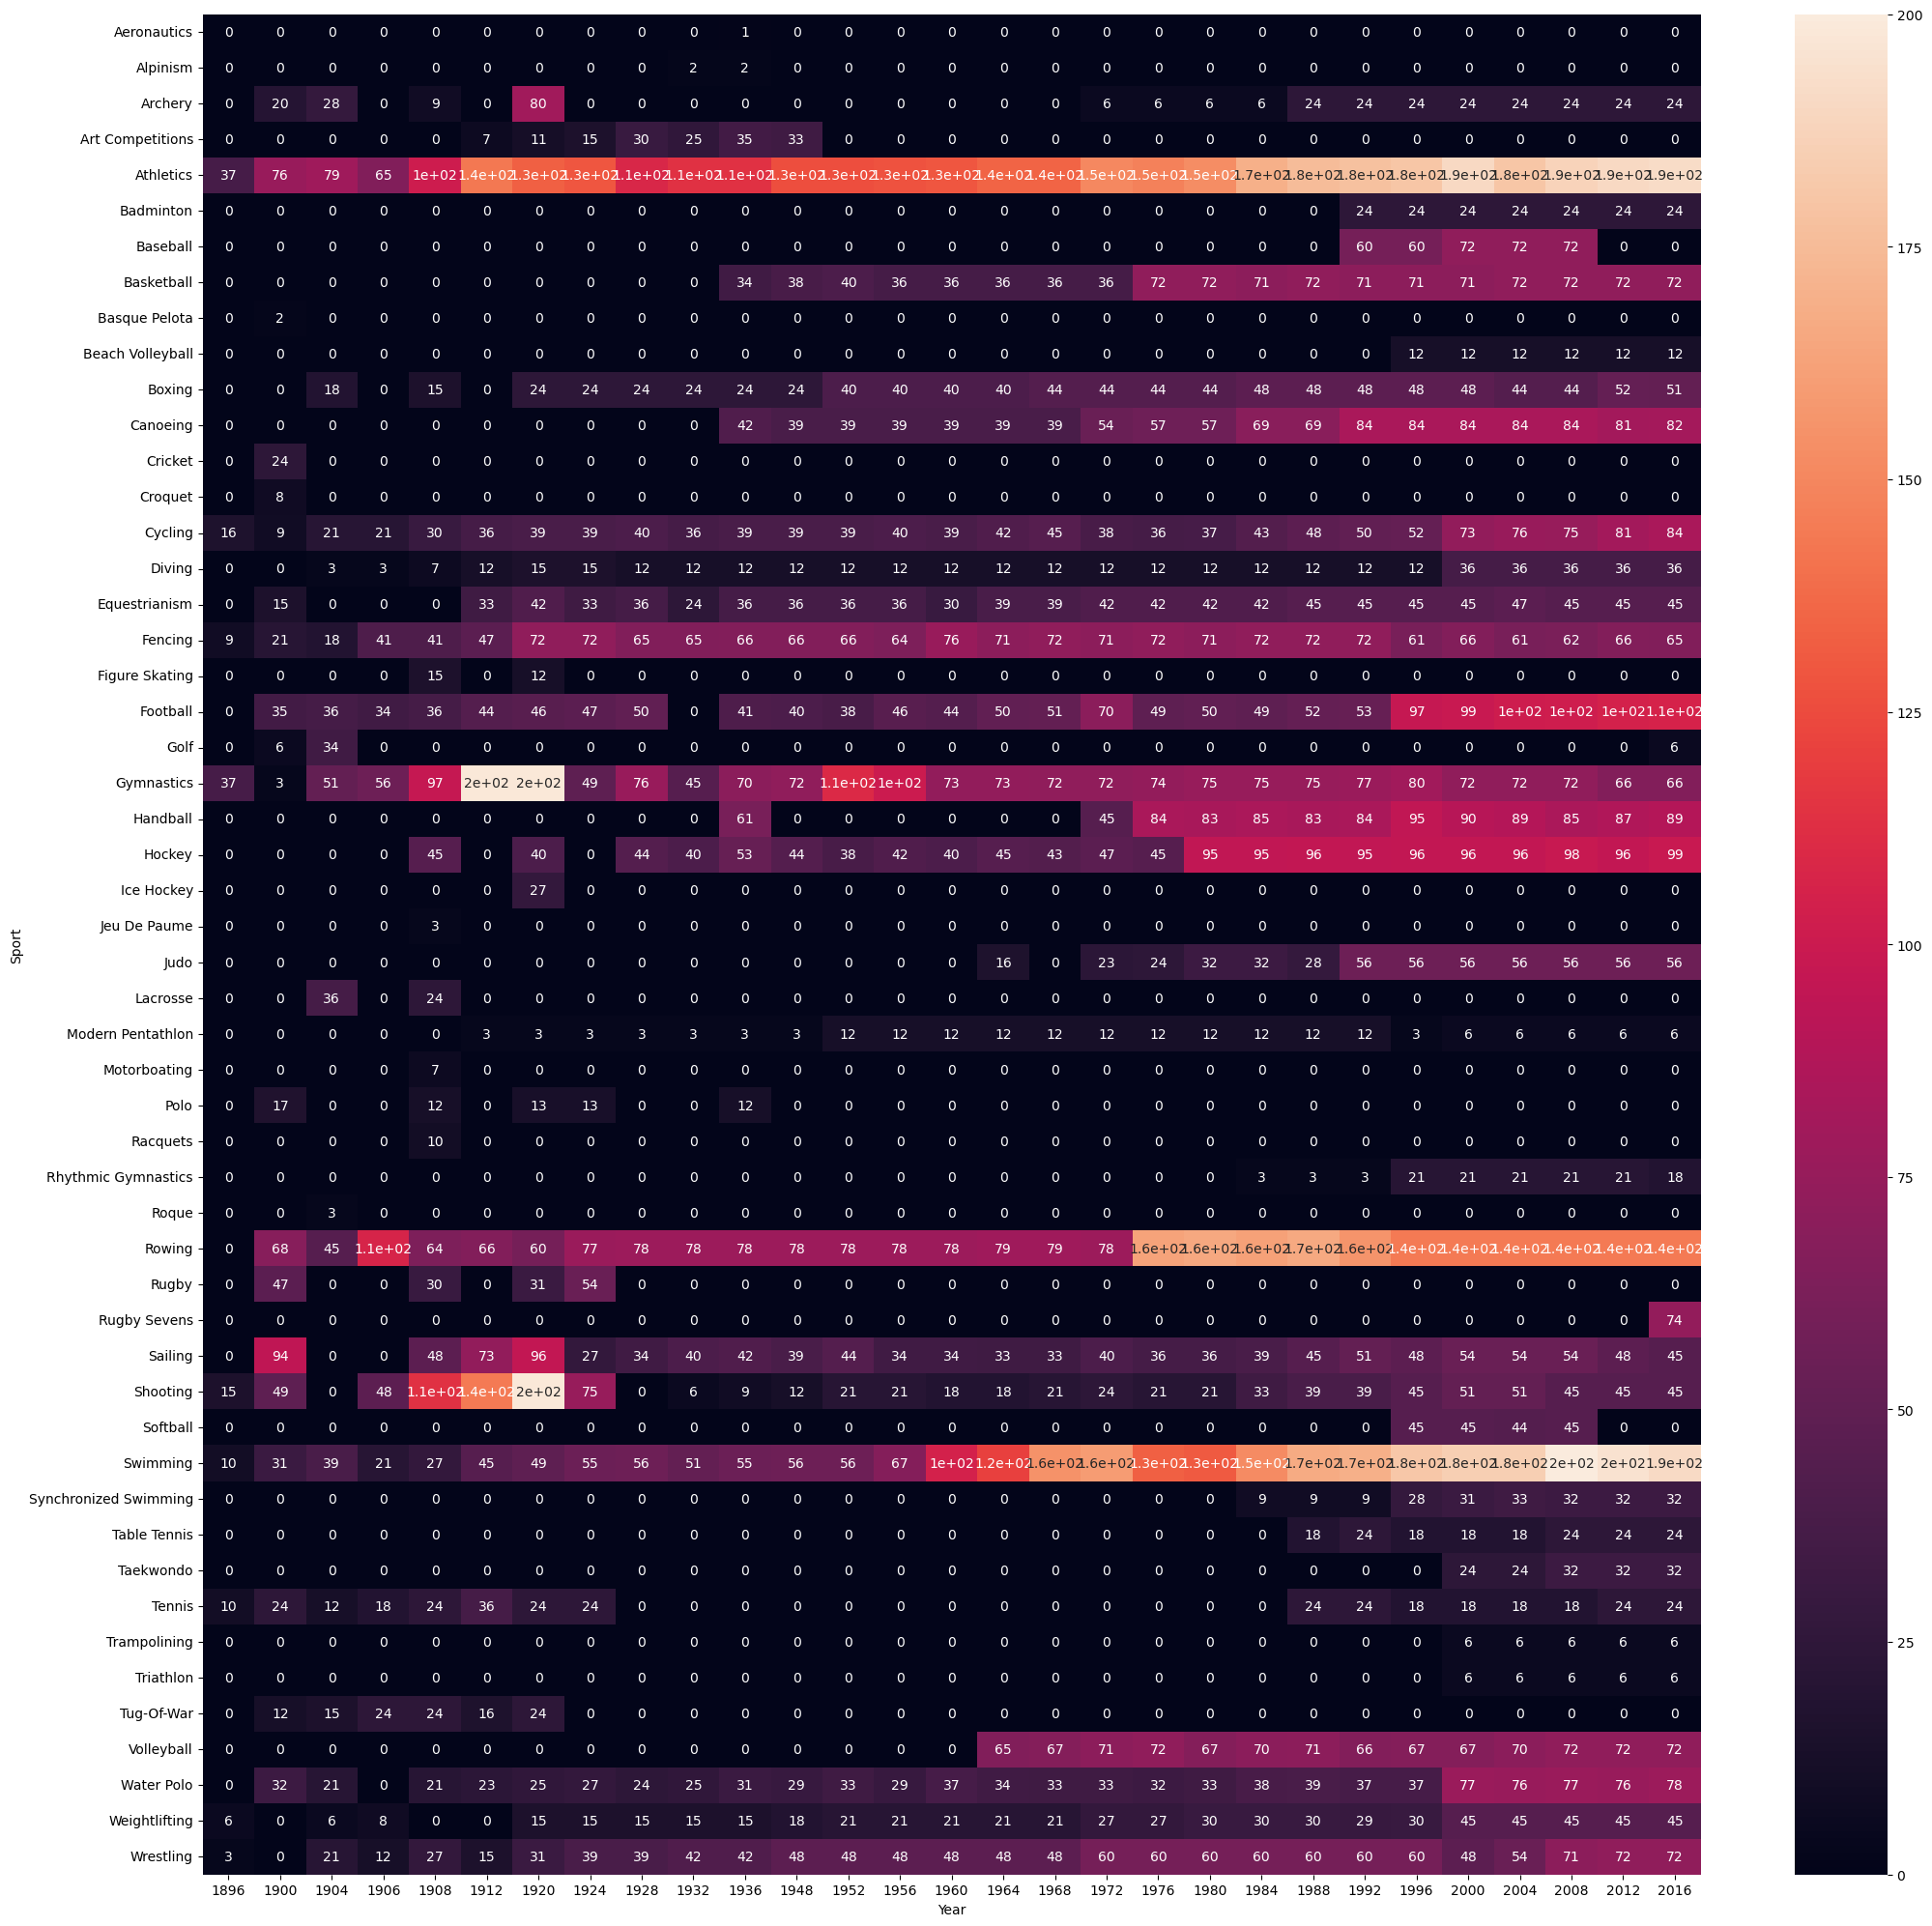

In [259]:
plt.figure(figsize = (25,25))
sns.heatmap(df.pivot_table(index = 'Sport', columns = 'Year', values = 'Medal',aggfunc = 'count').fillna(0).astype('int'),annot = True  )
plt.show()

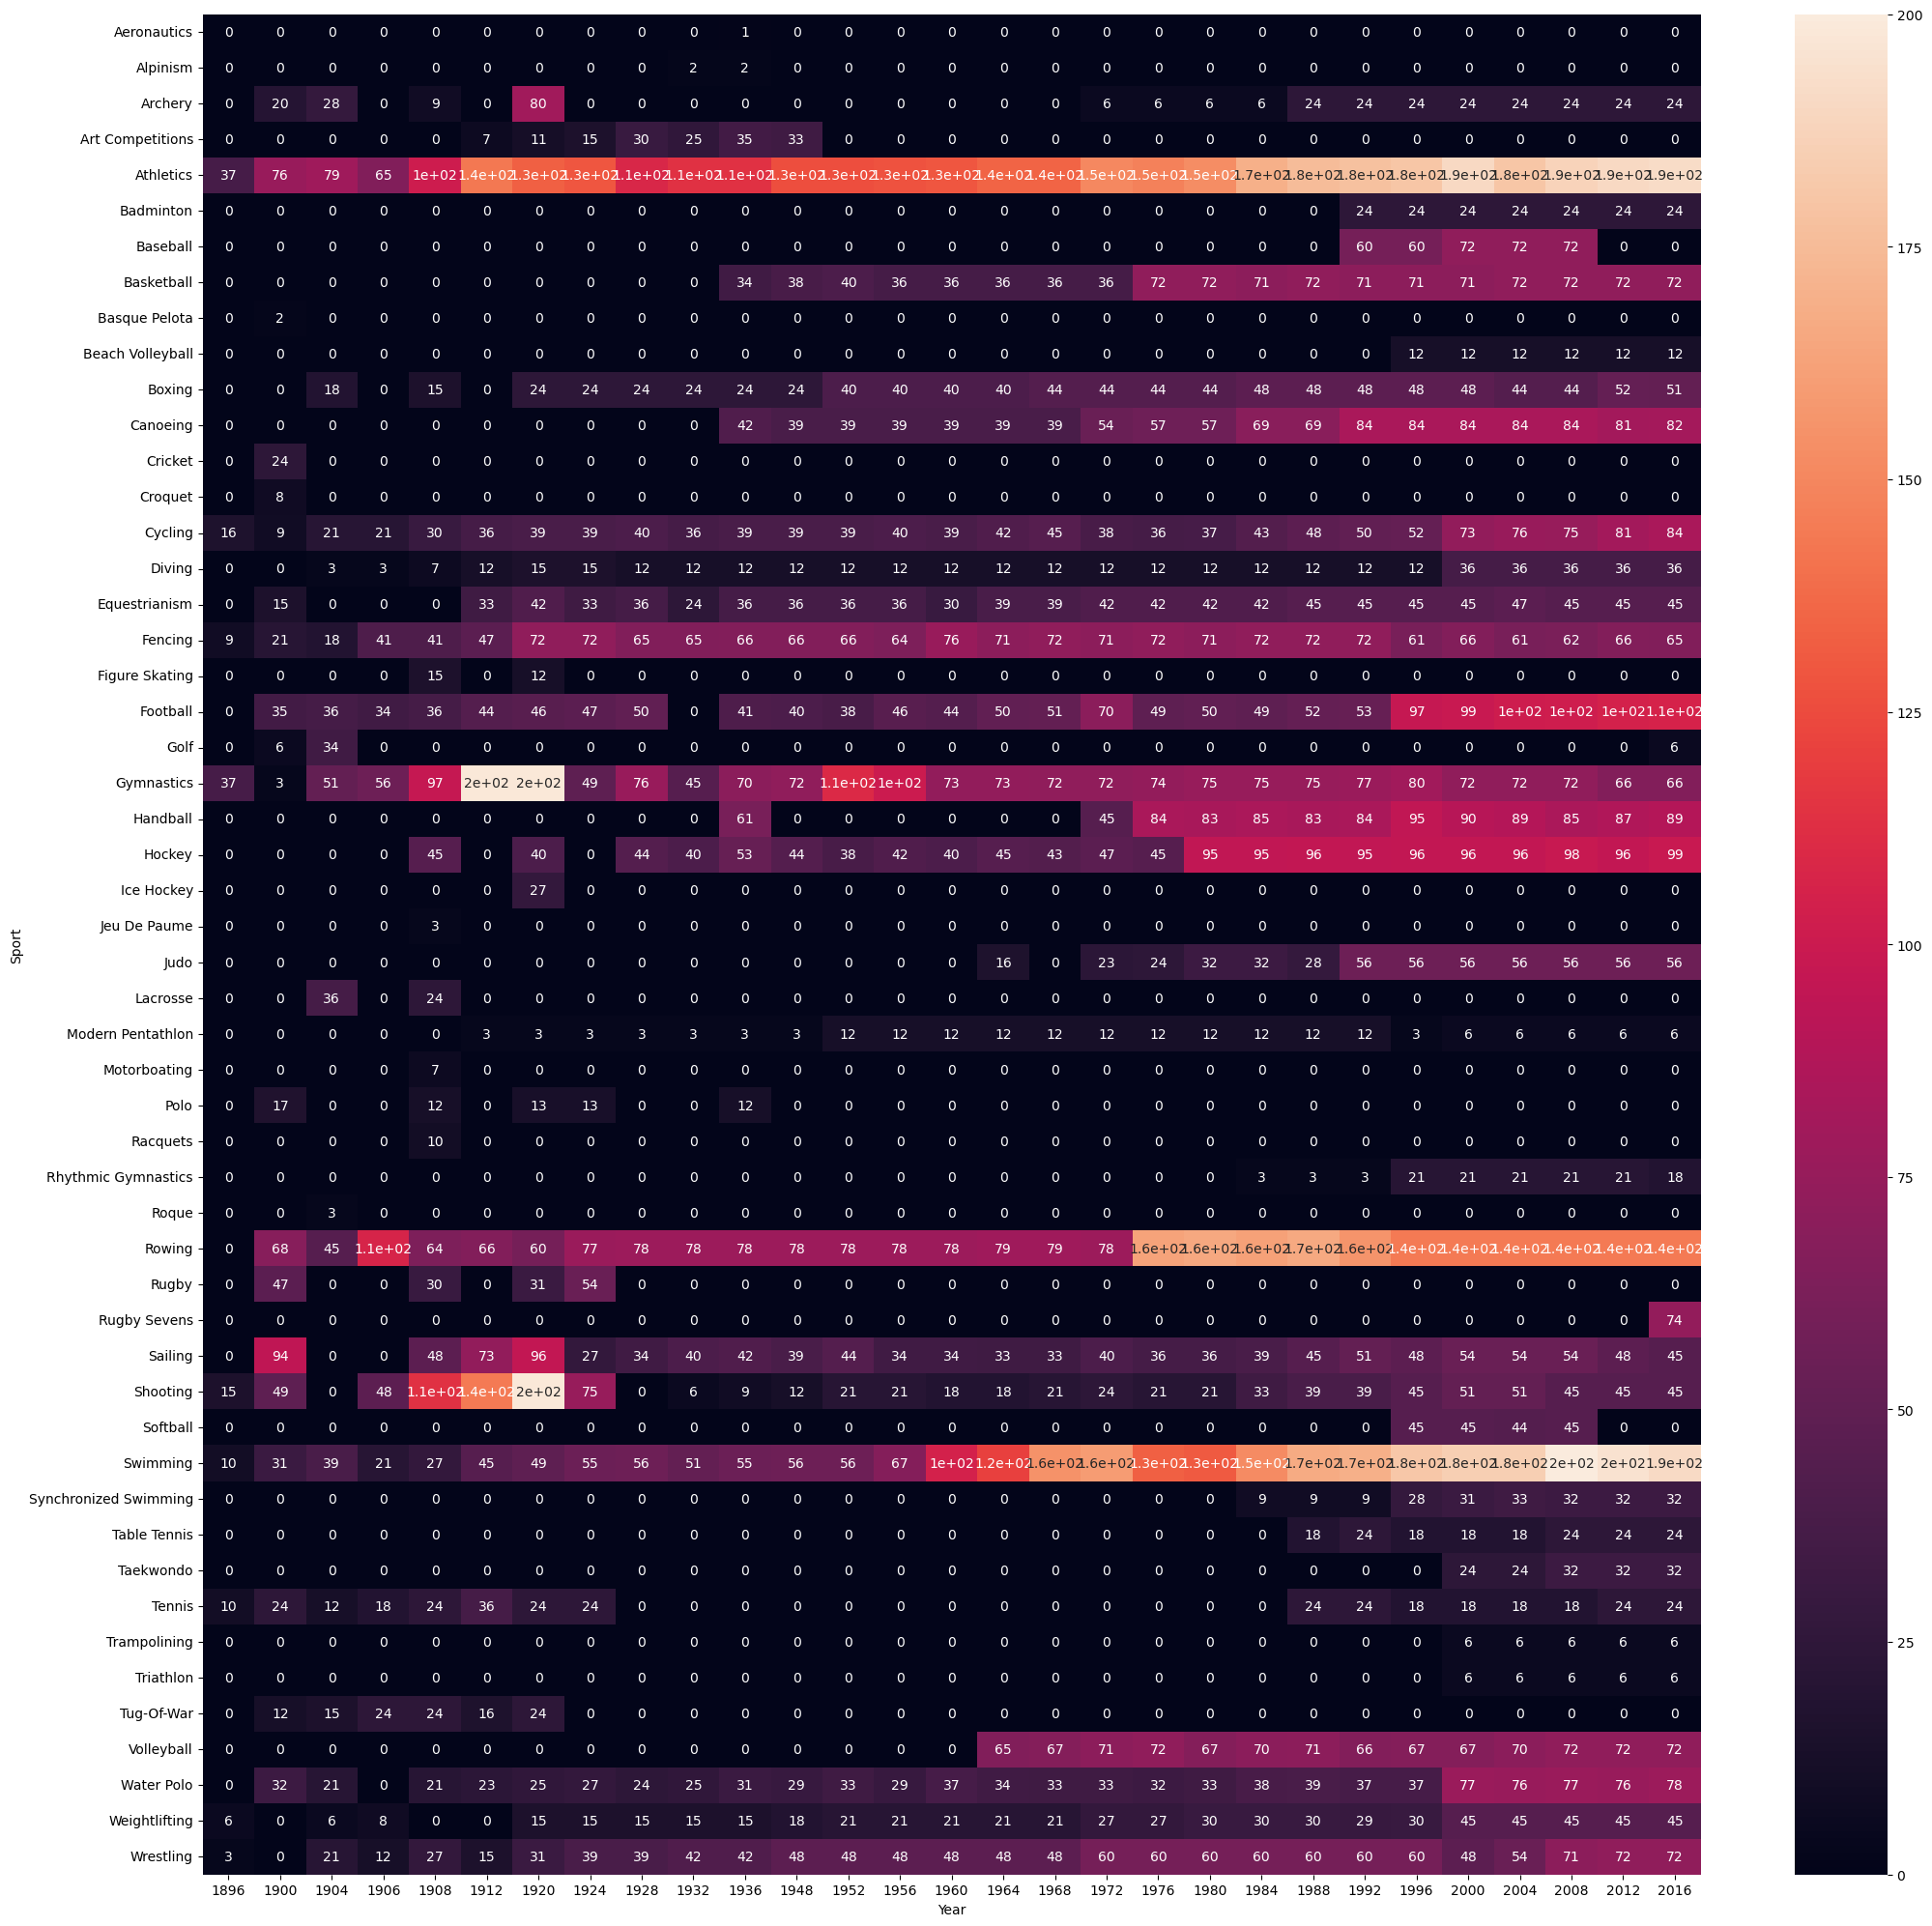

In [260]:
temp_df = df.dropna(subset = ['Medal'])
temp_df = temp_df.drop_duplicates(subset = ['Team','NOC','Games','Year','City','Sport','Event','Medal']   )
new_df = temp_df[temp_df['region'] == 'USA']
plt.figure(figsize = (25,25))
sns.heatmap(df.pivot_table(index = 'Sport', columns = 'Year', values = 'Medal',aggfunc = 'count').fillna(0).astype('int'),annot = True  )
plt.show()

In [274]:
def most_successful_player(df,country):
    temp_df = df.dropna(subset = ['Medal'])
    temp_df = temp_df[temp_df['region'] == country]
    x =  temp_df['Name'].value_counts().reset_index().head(15)
    x.columns = ['Name_player', 'Medals']
    x = x.merge(df,left_on = 'Name_player',right_on = 'Name',how = 'left')[['Name','Medals','Sport']].drop_duplicates('Name')
    return x

In [275]:
most_successful_player(df,"USA")

Name  Medals      Sport
0                            Michael Fred Phelps, II      28   Swimming
30                                Ryan Steven Lochte      12   Swimming
44   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12   Swimming
61                     Natalie Anne Coughlin (-Hall)      12   Swimming
73              Dara Grace Torres (-Hoffman, -Minas)      12   Swimming
86                    Matthew Nicholas "Matt" Biondi      11   Swimming
98                              Carl Townsend Osburn      11   Shooting
114                                Mark Andrew Spitz      11   Swimming
126                      Raymond Clarence "Ray" Ewry      10  Athletics
136                   Frederick Carlton "Carl" Lewis      10  Athletics
146                             Gary Wayne Hall, Jr.      10   Swimming
156                           Allyson Michelle Felix       9  Athletics
166                           Martin Joseph Sheridan       9  Athletics
181                        Shirley Frances Babashoff       9   Swimming
192                           Nathan Ghar-Jun Adrian       8   Swimming

##### Sometime we must assign value to new variable not that our merger will not be saved but in case of duplicates we donot need to assign to new variable


#### Let's find out the age at which maximum players wins medal in olympics

In [276]:
import plotly.figure_factory as ff

In [277]:
athlete_df = df.drop_duplicates(subset = ['Name','region'])

In [278]:
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event   Medal  \
0       Basketball             Basketball Men's Basketball     NaN   
1             Judo            Judo Men's Extra-Lightweight     NaN   
2         Football                 Football Men's Football     NaN   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics            Athletics Women's 100 metres     NaN   
...            ...                                     ...     ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   
222546      Hockey                     Hockey Men's Hockey     NaN   
222548    Football                 Football Men's Football     NaN   
222549      Rowing  Rowing Men's Lightweight Coxless Fours     NaN   
222551  Basketball           Basketball Women's Basketball     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222544       Russia   NaN       1     0       0  
222546    Argentina   NaN       0     0       0  
222548          USA   NaN       0     0       0  
222549       Russia   NaN       0     0       0  
222551      Belarus   NaN       0     0       0  

[116885 rows x 20 columns]

In [281]:
fig = ff.create_distplot([athlete_df['Age'].dropna()],['Age Distribution'],show_hist = False,show_rug = False)
fig.show()

#### athlete_df['Age'].dropna(): This part of the code extracts the 'Age' column from the DataFrame athlete_df and then uses dropna() to remove any rows with missing values (NaN) from the 'Age' column. The result is a pandas Series containing the non-null age values of athletes.

#### ['Age Distribution']: This is the label for the distribution plot. It will be used as the legend entry for the distribution line. In this case, the label is 'Age Distribution'.

#### show_hist=False: The show_hist parameter is set to False, which means the histogram portion of the distribution plot will not be shown. Only the kernel density estimation line will be displayed.

#### show_rug=False: The show_rug parameter is also set to False, which means rug marks (small vertical lines) will not be shown along the x-axis. Rug marks are used to indicate the data points' positions in a distribution.

#### fig.show(): Finally, the fig.show() method is used to display the distribution plot. The ff.create_distplot() function from the plotly.figure_factory module creates the distribution plot object, which is then displayed using the show() method.

#### In summary, the code creates a distribution plot (kernel density plot) for the 'Age' column of the DataFrame athlete_df, showing the age distribution of athletes. The plot displays the kernel density estimation line without the histogram and rug marks. The plot is labeled as 'Age Distribution', and it will be displayed using Plotly's interactive visualization capabilities.







#### To plot multiple like for gold, silver or bronze then we can do it as

In [295]:
athlete_df = df.drop_duplicates(subset = ['Name','region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] =='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] =='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] =='Bronze']['Age'].dropna()

In [291]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist = False,show_rug = False)
fig.show()

#### Let's find out age distribution on different games

In [303]:
x = []
name = []
famous_sports = [ 'Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Ice Hockey']
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

In [305]:
fig = ff.create_distplot(x,name,show_hist = False,show_rug = False)
fig.show()

In [306]:
athlete_df['Medal'].fillna("No Medal",inplace = True)

C:\Users\karki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

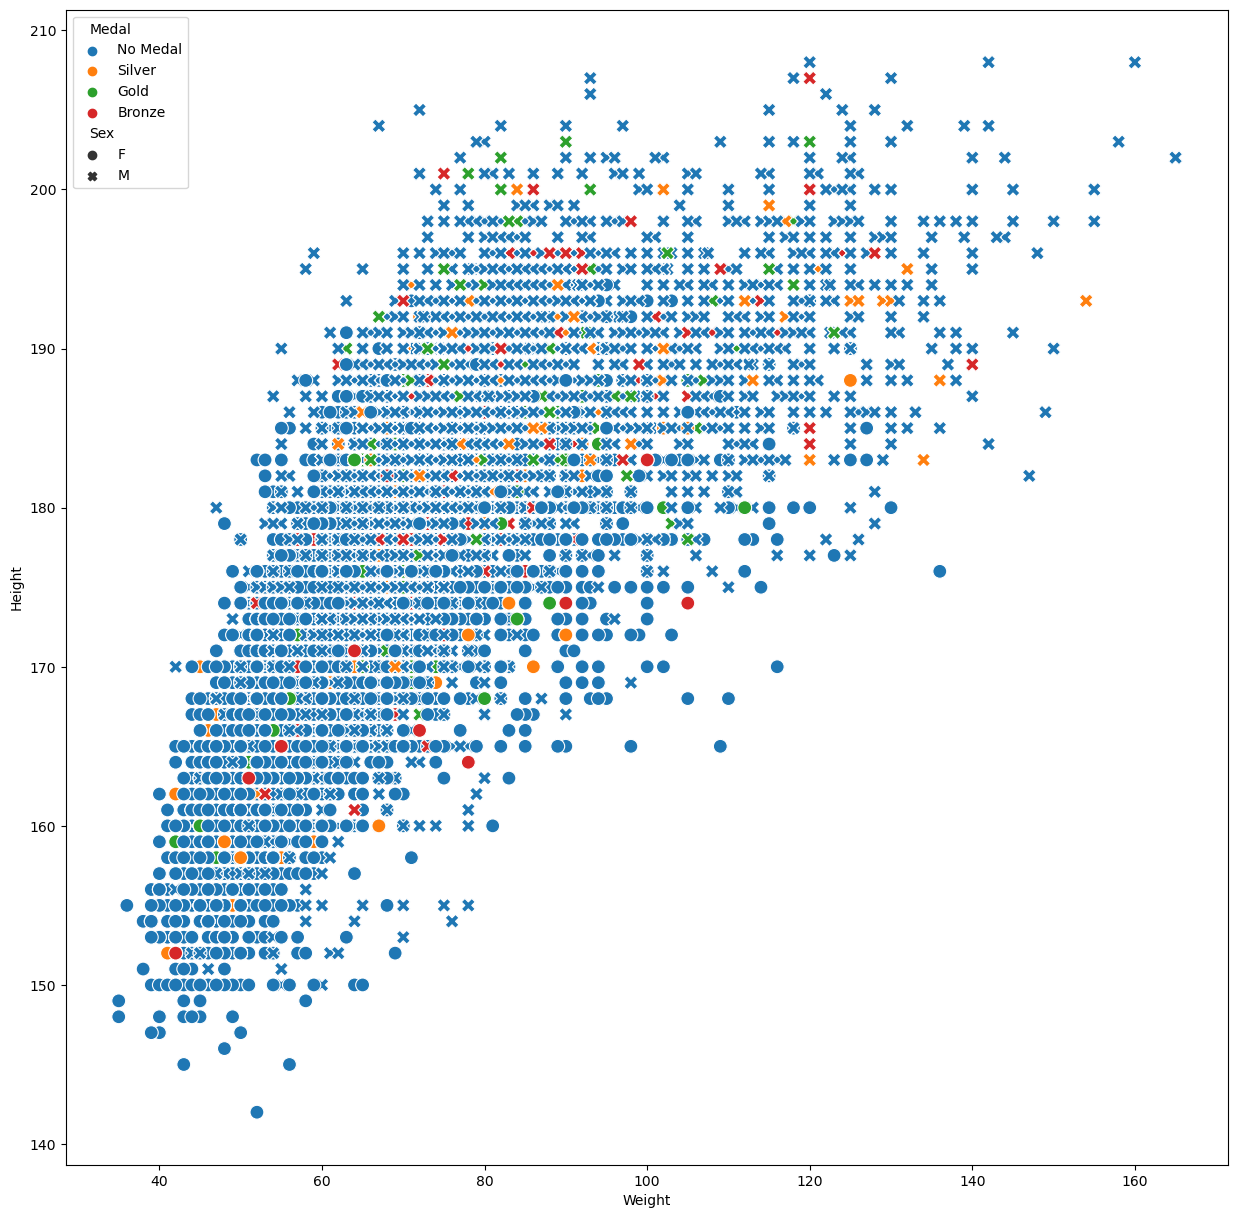

In [310]:
plt.figure(figsize = (15,15))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue = temp_df['Medal'],style = temp_df['Sex'],s = 100)

In [314]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [315]:
men

Year  Name
0   1896   174
1   1900  1181
2   1904   629
3   1906   759
4   1908  1772
5   1912  1978
6   1920  2280
7   1924  2535
8   1928  2342
9   1932  1382
10  1936  3539
11  1948  3629
12  1952  3468
13  1956  2193
14  1960  3755
15  1964  3290
16  1968  3555
17  1972  4552
18  1976  3320
19  1980  3151
20  1984  4299
21  1988  4704
22  1992  4769
23  1996  4811
24  2000  4294
25  2004  3931
26  2008  3990
27  2012  3679
28  2016  4022

In [316]:
women

Year  Name
0   1900    23
1   1904     6
2   1906     6
3   1908    44
4   1912    53
5   1920    73
6   1924   132
7   1928   285
8   1932   162
9   1936   316
10  1948   420
11  1952   409
12  1956   288
13  1960   473
14  1964   507
15  1968   599
16  1972   818
17  1976  1028
18  1980   875
19  1984  1368
20  1988  1734
21  1992  2080
22  1996  2518
23  2000  2790
24  2004  2820
25  2008  2947
26  2012  2919
27  2016  3209

In [325]:
final = men.merge(women,on = 'Year',how = 'left')
final.rename(columns = {'Name_x': 'Male','Name_y' : 'Female'},inplace = True)

In [329]:
final.fillna(0,inplace =True)

In [330]:
fig = px.line(final, x = 'Year' , y = ['Male','Female'])
fig.show()